# K Means on MNIST Dataset

In [7]:
import pandas as pd # for manipulating tabular data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality


In [8]:
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [18]:
# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import StandardScaler

# to provide an implementation of the k-means algorithm
from sklearn.cluster import KMeans

# to provide an implementation of PCA for reducing the dimensionality of our data
from sklearn.decomposition import PCA

In [9]:
# Loading the Data set

# load the data into a numpy array
data = datasets.MNIST("data", train=True, download=True, transform = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor()])).data.numpy()

# data = np.array(data)
# type(data)

In [13]:
data.shape

(60000, 28, 28)

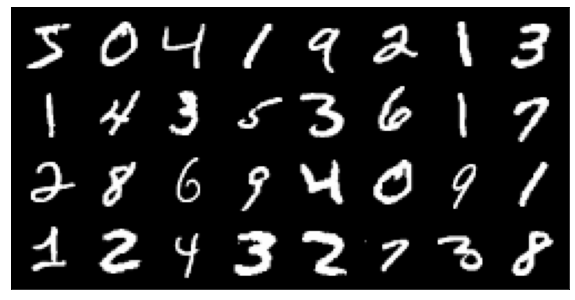

In [14]:
# visualize a batch of data
plt.figure(figsize=(10,10))
plt.imshow(make_grid(torch.from_numpy(data[:32,None]), pad_value=0, padding=3).data[0], cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()

# Preprocessing the Data

In [19]:
# flatten the data into vectors
X = data.reshape((data.shape[0], data.shape[1]**2))
X.shape

(60000, 784)

In [20]:
# use standard Scaler to transform the vectors
scaler = StandardScaler()
# scale the features 
X = scaler.fit_transform(X)

In [22]:
# Set the clusters 
k = 10

# Use the Kmeans object
KMeans_MNIST = KMeans(n_clusters=k,random_state=42)

# Fit the model to the data
KMeans_MNIST.fit(X)

KMeans(n_clusters=10, random_state=42)

In [23]:
# extract cluster centroids 
# transform back to original scale
# convert back to 28 by 28 images
centroids = scaler.inverse_transform(KMeans_MNIST.cluster_centers_).reshape((k,28,28))

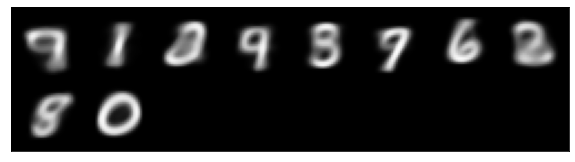

In [24]:
# visualize a batch of data
plt.figure(figsize=(10,10))
plt.imshow(make_grid(torch.from_numpy(centroids[:,None]), pad_value=0, padding=3).data[0], cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
# extract the cluster labels of each image in the data
labels = KMeans_MNIST.labels_

In [26]:
# filter, re-scale and reshape the data for a specified cluster
cluster_num = 0
cluster_num_data = scaler.inverse_transform(X[labels==cluster_num])
cluster_num_data = cluster_num_data.reshape((cluster_num_data.shape[0], 28, 28))

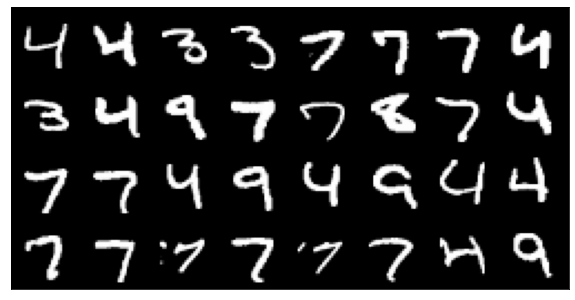

In [27]:
# visualize data points from a particular cluster
plt.figure(figsize=(10,10))
plt.imshow(make_grid(torch.from_numpy(cluster_num_data[:32,None]), pad_value=0, padding=3).data[0], cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()

#  PRINCIPAL COMPONENT 1

In [28]:
# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# fit our pca object to the scaled data
X_pca = pca.fit_transform(X)

# explained variance is the fraction of the total variance in the entire dataset that a principal component accounts for
pca.explained_variance_ratio_

array([0.05646717, 0.04078272])

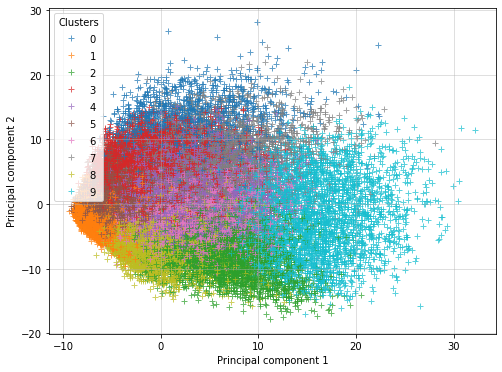

In [29]:
# visualize PC1 vs PC2 with color as the cluster label
plt.figure(figsize=(8,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,
                   linewidths=1, cmap='tab10', marker='+', alpha=0.7)
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Clusters")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.grid(alpha=0.5)
plt.show()

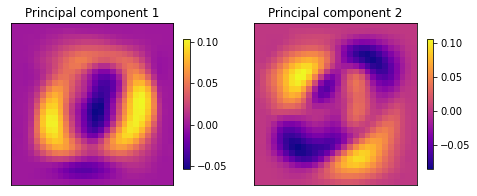

In [30]:
# visualising the coordinates of the 2 principal components in feature space
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.imshow(pca.components_.reshape((2, 28, 28))[0], cmap='plasma')
plt.title('Principal component 1')
plt.colorbar(shrink=0.3)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(pca.components_.reshape((2, 28, 28))[1], cmap='plasma')
plt.title('Principal component 2')
plt.colorbar(shrink=0.3)
plt.xticks([])
plt.yticks([])
plt.show()

# Linearly interpolate across the principal components, reconstructing the corresponding images

In [31]:
# set the number of interpolation points to evaluate
num_interp = 32

In [32]:
# set array to store interpolated values
X_pc1_interp = np.zeros((num_interp, 2))

# linearly interpolate from the smallest to the largest value of pc1
X_pc1_interp[:,0] = np.linspace(X_pca[:,0].min(), X_pca[:,0].max(), num_interp)

# set pc2 constant at the mean value
X_pc1_interp[:,1] = X_pca[:,1].mean()

In [33]:
# decode the principal components and re-scale
X_pc1_interp = scaler.inverse_transform(pca.inverse_transform(X_pc1_interp))

# reshape to image dimensions
X_pc1_interp = X_pc1_interp.reshape((num_interp,28,28))

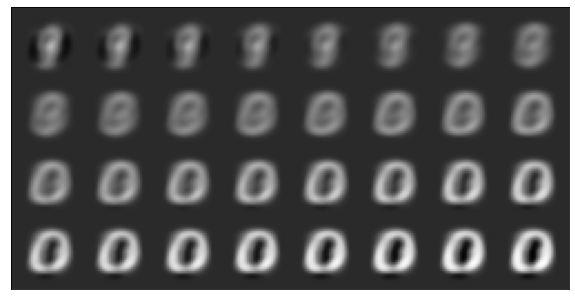

In [34]:
# visualize data points from a particular cluster
plt.figure(figsize=(10,10))
plt.imshow(make_grid(torch.from_numpy(X_pc1_interp[:,None]), pad_value=0, padding=3).data[0], cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()

# PRINCIPAL COMPONENT 2

In [35]:
# set array to store interpolated values
X_pc2_interp = np.zeros((num_interp, 2))

# set pc1 constant at the mean value
X_pc2_interp[:,0] = X_pca[:,0].mean()

# linearly interpolate from the smallest to the largest value of pc2
X_pc2_interp[:,1] = np.linspace(X_pca[:,1].min(), X_pca[:,1].max(), num_interp)

In [36]:
# decode the principal components and re-scale
X_pc2_interp = scaler.inverse_transform(pca.inverse_transform(X_pc2_interp))

# reshape to image dimensions
X_pc2_interp = X_pc2_interp.reshape((num_interp,28,28))

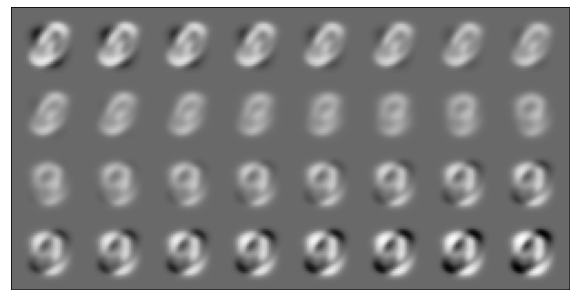

In [37]:
# visualize data points from a particular cluster
plt.figure(figsize=(10,10))
plt.imshow(make_grid(torch.from_numpy(X_pc2_interp[:,None]), pad_value=0, padding=3).data[0], cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()